In [3]:
class SeismicDesign():
    
    #Basic design parameters
    def __init__(self, sli, spi, rli, rpi, active_rp, active_rl, sp_salvo):
        self.sli = sli
        self.spi = spi
        self.rli = rli
        self.rpi = rpi
        self.active_rp = active_rp
        self.active_rl = active_rl
        self.sp_salvo = sp_salvo
        self.fold = active_rp*rpi*sp_salvo*spi/(4*sli*rli)
    
    #Print design chart
    def plot_design(self):
        import matplotlib.pyplot as plt        
        #Size of output chart
        from pylab import rcParams
        rcParams['figure.figsize'] = 20,20
                
        #Printing first RLs
        for i in range(self.active_rl):
            plt.plot([0, self.active_rp*self.rpi], 
                     [i*self.rli, i*self.rli],
                     'k', alpha = 1, linewidth=2, color='cornflowerblue')
        #Printing first salvo
        plt.plot([self.active_rp*self.rpi/2, self.active_rp*self.rpi/2], 
                 [(self.active_rl-1)*self.rli/2-self.sp_salvo*self.spi/2, (self.active_rl-1)*self.rli/2+self.sp_salvo*self.spi/2], 
                 'k', alpha = 1, linewidth=2, color='r')
        
        #Printing second RLs
        delta_x = self.sli
        delta_y_rl = -self.active_rl*self.rli
        delta_y_sl = -self.active_rl*self.rli
        for i in range(self.active_rl):
            plt.plot([0 + delta_x, self.active_rp*self.rpi + delta_x], 
                     [i*self.rli + delta_y_rl, i*self.rli + delta_y_rl],
                     'k', alpha = 1, linewidth=1, color='cornflowerblue') #, dashes=[2,2]
        #Printing second salvo
        plt.plot([self.active_rp*self.rpi/2 + delta_x, self.active_rp*self.rpi/2 + delta_x], 
                 [(self.active_rl-1)*self.rli/2-self.sp_salvo*self.spi/2 + delta_y_sl, (self.active_rl-1)*self.rli/2+self.sp_salvo*self.spi/2 + delta_y_sl], 
                 'k', alpha = 1, linewidth=1, color='r') #, dashes=[2,2]        
        
        #Arrow and legend SLi
        x1 = self.active_rp*self.rpi/2
        x2 = x1 + self.sli
        y1 = y2 = (self.active_rl*self.rli/2+self.sp_salvo*self.spi/2)*0.6
        y_text = self.active_rl*self.rli/2+self.sp_salvo*self.spi/2
        plt.plot((x1,x2),(y1,y2), 'k',linewidth=1) # arrow line
        #plt.plot((x1,x1),(y1,y1), 'k', marker='>',) # right arrowhead
        #plt.plot((x2,x2),(y2,y2), 'k', marker='<',) # left arrowhead
        plt.text(x2+self.sli,y2,"SLi = {}".format(self.sli), va='center')
        plt.text(0,y_text,"Fold = {}\nRPi = {}\nSPi = {}\nSLi = {}\nSPi = {}".format(self.fold, self.rpi, self.spi, self.rli, self.sli), va='top')

        #plt.axis('equal')
        
        
    #Plot all rays on 1 salvo
                
    import matplotlib.pyplot as plt

    def plot_line_points(x1, y1, x2, y2, inter):
        length = math.sqrt((x1-x2)**2+(y1-y2)**2)
        points_list = []
        inter_x = abs(x1-x2) * inter/length
        inter_y = abs(y1-y2) * inter/length
        x = x1
        y = y1
        for i in range(1, math.floor(length/inter) - 1):
            points_list.append((x + inter_x, y + inter_y))
            x += inter_x
            y += inter_y
        for (x,y) in points_list:
            plt.plot(x,y,'ro')
                
    def plot_all_rays(self):
        x1 = 0
        y1 = 0
        x2 = self.rli*self.active_rl
        y2 = 0
        for i in range(self.active_rl):
            plot_line_points(x1, y1, x2, y2, self.rpi)
            y1 += self.rli
            y2 += self.rli
        

# Hello

#### Hello

In [4]:
design_test = SeismicDesign(sli = 250,
                            spi = 25,
                            rli = 250,
                            rpi = 25,
                            active_rp = 400,
                            active_rl = 12,
                            sp_salvo = 430)

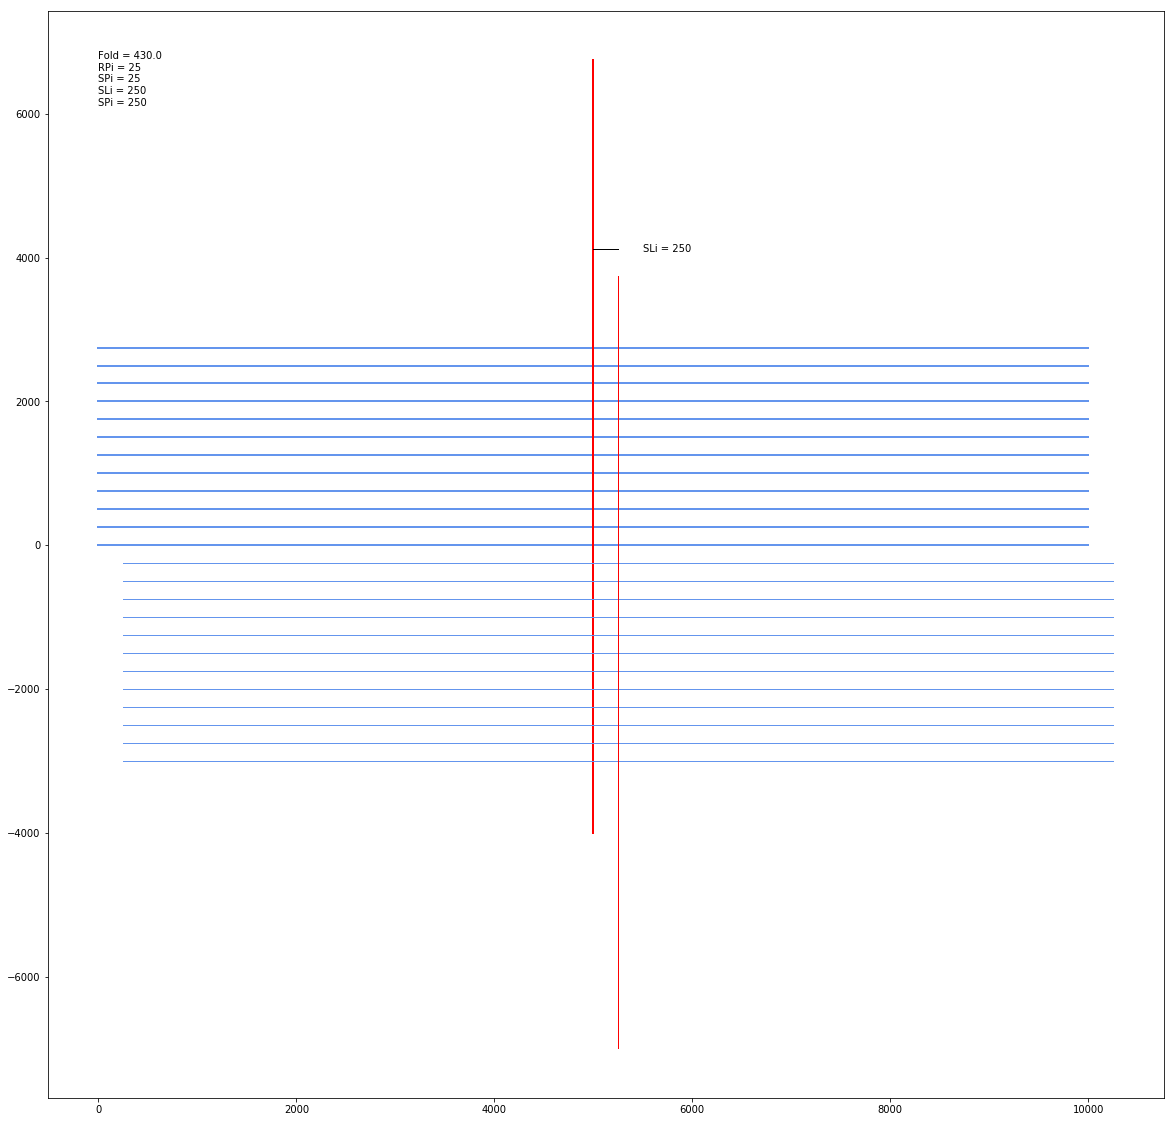

In [5]:
design_test.plot_design()


In [6]:
design_test.rli

250

In [8]:
import math
class line():
    def __init__(self, x1, y1, x2, y2, inter=25):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.inter = inter
        self.length = math.sqrt((x1-x2)**2+(y1-y2)**2)
        
        points_list = []
        inter_x = abs(x1-x2) * self.inter/self.length
        inter_y = abs(y1-y2) * self.inter/self.length
        x = self.x1
        y = self.y1
        for i in range(1, math.floor(self.length/self.inter) - 1):
            points_list.append((x + inter_x, y + inter_y))
            x += inter_x
            y += inter_y
        self.points_list = points_list
        
        
        
line_test = line(1,5,10,3)
print(line_test.length)
print(line_test.points_list)
type(line_test.points_list)


9.219544457292887
[]


list

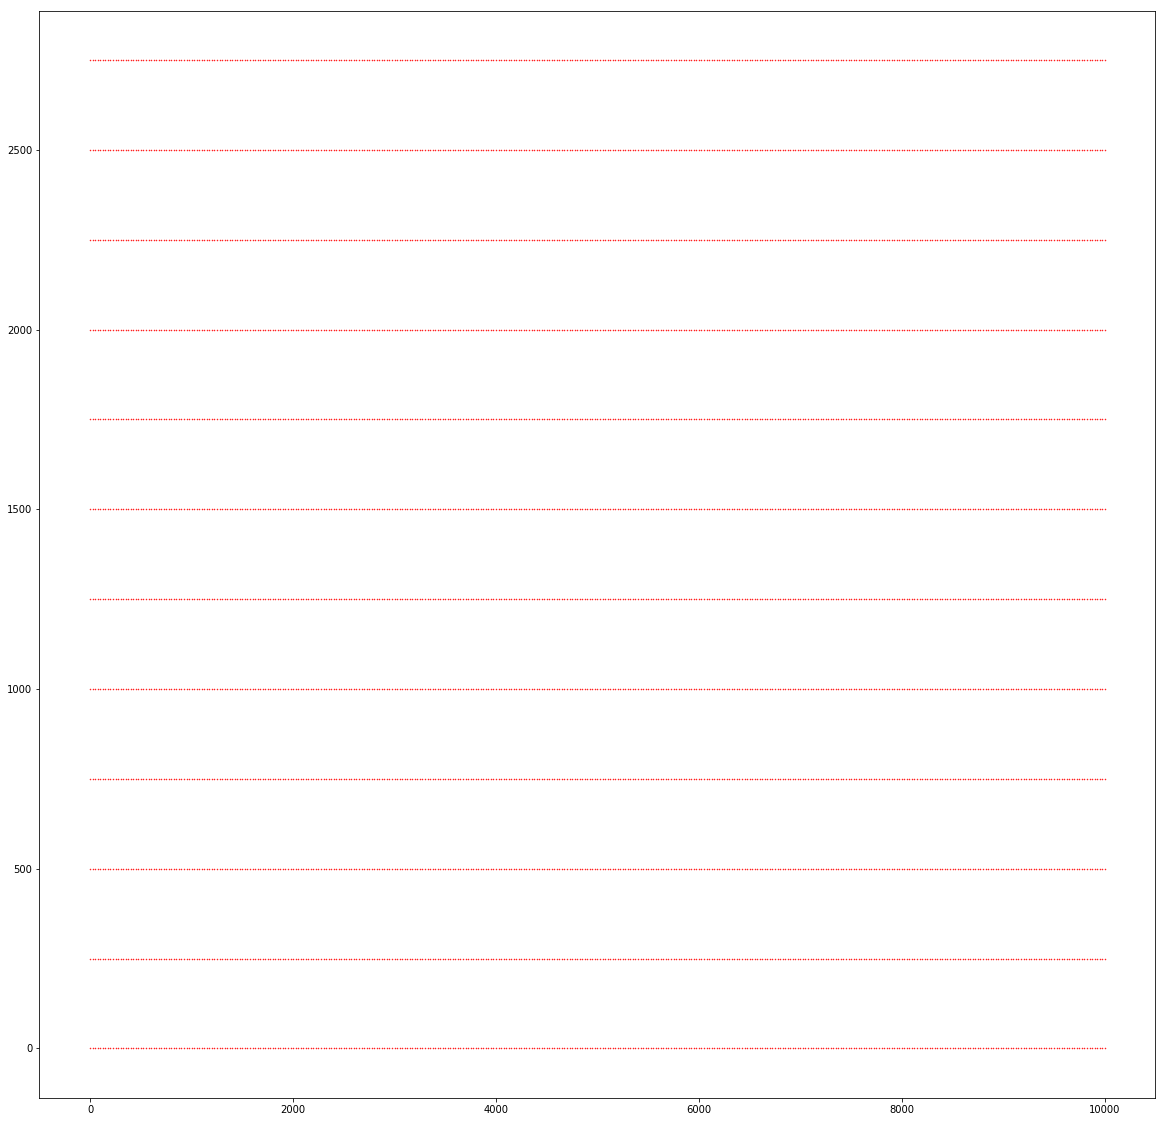

In [9]:
import matplotlib.pyplot as plt
import math

def plot_line_points(x1, y1, x2, y2, inter):

        length = math.sqrt((x1-x2)**2+(y1-y2)**2)
        points_list = []
        inter_x = abs(x1-x2) * inter/length
        inter_y = abs(y1-y2) * inter/length
        x = x1
        y = y1
        for i in range(0, math.floor(length/inter) + 1):
            points_list.append((x, y))
            x += inter_x
            y += inter_y
        for (x,y) in points_list:
            plt.plot(x,y,'ro', markersize=0.5)
                
def plot_all_rays():
        x1 = 0
        y1 = 0
        x2 = 400*25
        y2 = 0
        for i in range(12):
            plot_line_points(x1, y1, x2, y2, 25)
            y1 += 250
            y2 += 250
        
            
plot_all_rays()

In [10]:

class LinePoints():
    def __init__(self, x1, y1, x2, y2, inter):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.inter = inter
    
    def points_list(self):
        import math
        length = math.sqrt((self.x1-self.x2)**2+(self.y1-self.y2)**2)
        points_list = []
        inter_x = abs(self.x1-self.x2) * self.inter/length
        inter_y = abs(self.y1-self.y2) * self.inter/length
        x = self.x1
        y = self.y1
        for i in range(0, math.floor(length/self.inter)):
            points_list.append((x, y))
            x += inter_x
            y += inter_y
        return(points_list)
    
def plot_line_points(points_list):
    import matplotlib.pyplot as plt
    for (x,y) in points_list:
        plt.plot(x,y,'ro', markersize=2)
    n = len(points_list)
    plt.plot((points_list[0][0],points_list[n-1][0]),(points_list[0][1],points_list[n-1][1]), 'k', linewidth=1, alpha=0.5, color='lightskyblue')


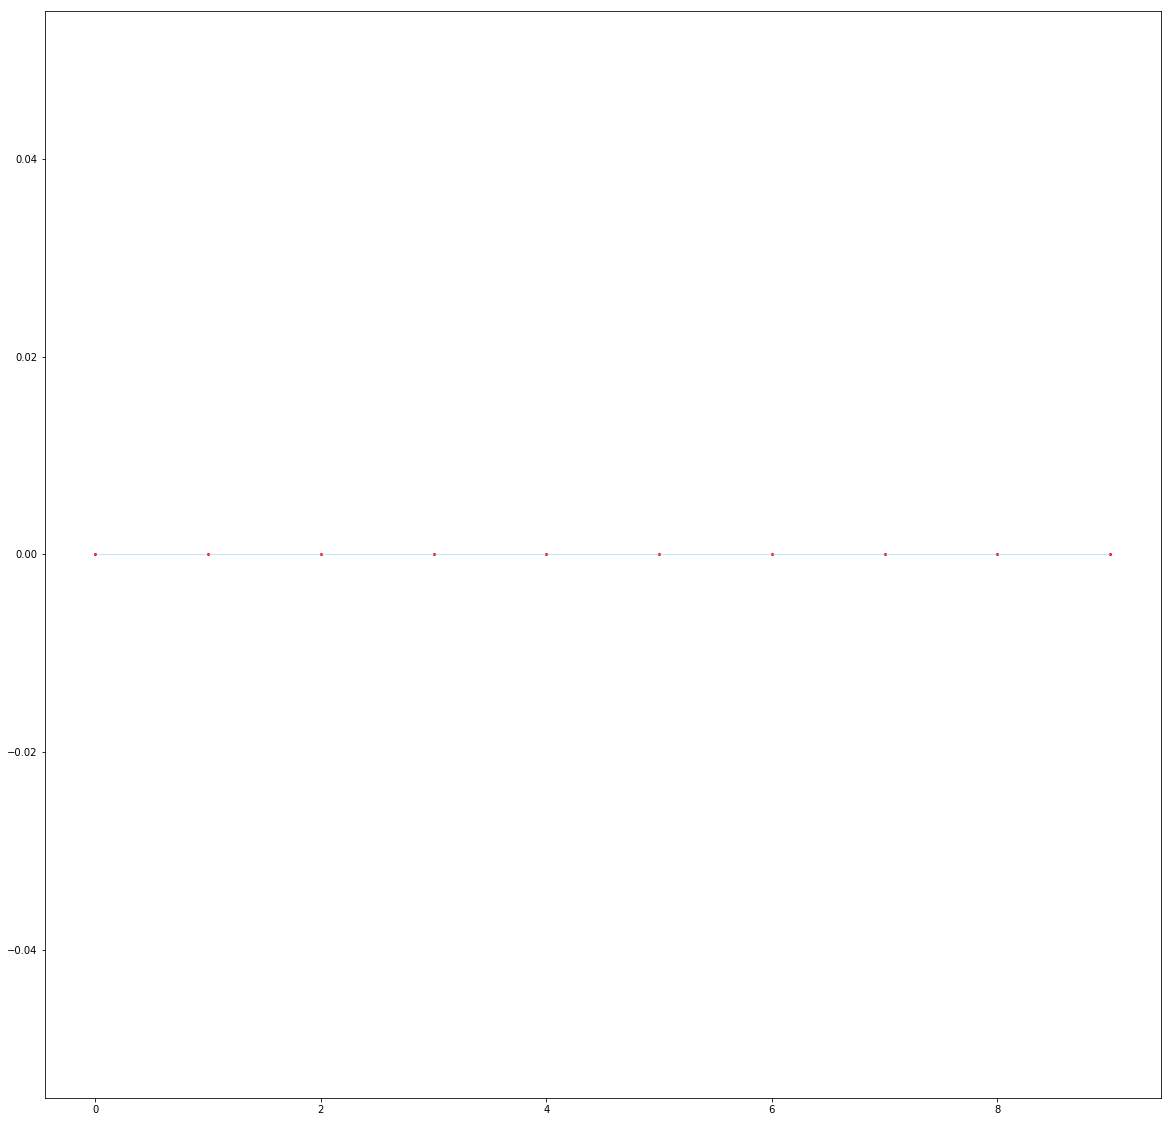

In [11]:
yoyo = LinePoints(0, 0, 10, 0, 1)
plot_line_points(yoyo.points_list())

In [ ]:
                
#def plot_all_rays(x1 = 0, y1 = 0, x2 = 400*25, y2 = 0):
#    for i in range(12):
#        plot_line_points(x1, y1, x2, y2, 25)
#        y1 += 250
#        y2 += 250
#        
#plot_all_rays()

In [25]:
def all_spread_rp_list(active_rp, active_rl, rpi, rli):
    rp_list = []
    for i in range(0, active_rl):
        yoyo = LinePoints(0, i * rli, (active_rp) * rpi, i * rli, rpi)
        rp_list = rp_list + yoyo.points_list()
    return(rp_list)
    
def salvo_sp_list(active_rp, active_rl, sp_salvo, spi, rpi, rli):
    tata = LinePoints((active_rp-1)*rpi/2, (active_rl-1)*rli/2-(sp_salvo-1)*spi/2, (active_rp-1)*rpi/2, (active_rl-1)*rli/2+(sp_salvo-1)*spi/2, spi)
    sp_list = tata.points_list()
    return(sp_list)

def plot_all_rays(sp, rp):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,20))
    for (x1, y1) in sp:
        for (x2, y2) in rp:
            plt.plot((x1,x2),(y1,y2), 'k', linewidth=1, alpha=0.5, color='lightskyblue') #Ray
            plt.plot((x1+x2)/2,(y1+y2)/2,'s', markersize=20, alpha=0.05, color='darkred') #Mid point = bin impact
    plt.show()
            


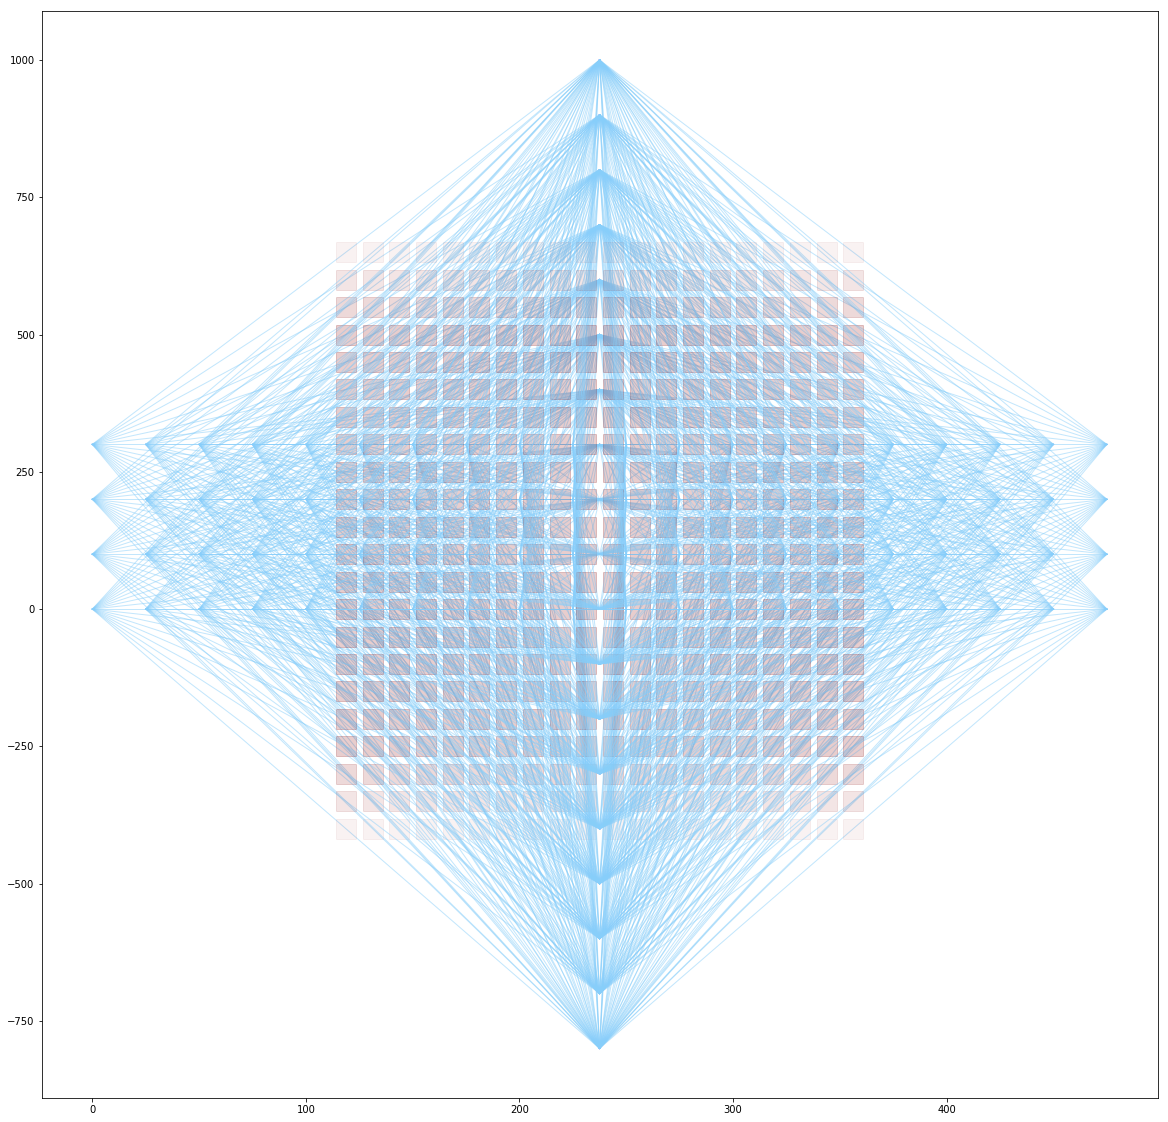

In [28]:
def print_all_rays(design):
    sspp = salvo_sp_list(active_rp = design.active_rp, active_rl = design.active_rl, rli = design.rli, rpi = design.rpi, sp_salvo = design.sp_salvo, spi = design.spi)
    rrpp = all_spread_rp_list(active_rp = design.active_rp, active_rl = design.active_rl, rpi = design.rpi, rli = design.rli)
    plot_all_rays(sspp, rrpp)
    
design_test2 = SeismicDesign(sli = 250,
                             spi = 100,
                             rli = 100,
                             rpi = 25,
                             active_rp = 20,
                             active_rl = 4,
                             sp_salvo = 20)

print_all_rays(design_test2)

In [107]:
print(rrpp)

[(0, 0), (25.0, 0.0), (50.0, 0.0), (75.0, 0.0), (100.0, 0.0), (125.0, 0.0), (150.0, 0.0), (175.0, 0.0), (200.0, 0.0), (225.0, 0.0), (0, 150), (25.0, 150.0), (50.0, 150.0), (75.0, 150.0), (100.0, 150.0), (125.0, 150.0), (150.0, 150.0), (175.0, 150.0), (200.0, 150.0), (225.0, 150.0), (0, 300), (25.0, 300.0), (50.0, 300.0), (75.0, 300.0), (100.0, 300.0), (125.0, 300.0), (150.0, 300.0), (175.0, 300.0), (200.0, 300.0), (225.0, 300.0), (0, 450), (25.0, 450.0), (50.0, 450.0), (75.0, 450.0), (100.0, 450.0), (125.0, 450.0), (150.0, 450.0), (175.0, 450.0), (200.0, 450.0), (225.0, 450.0)]


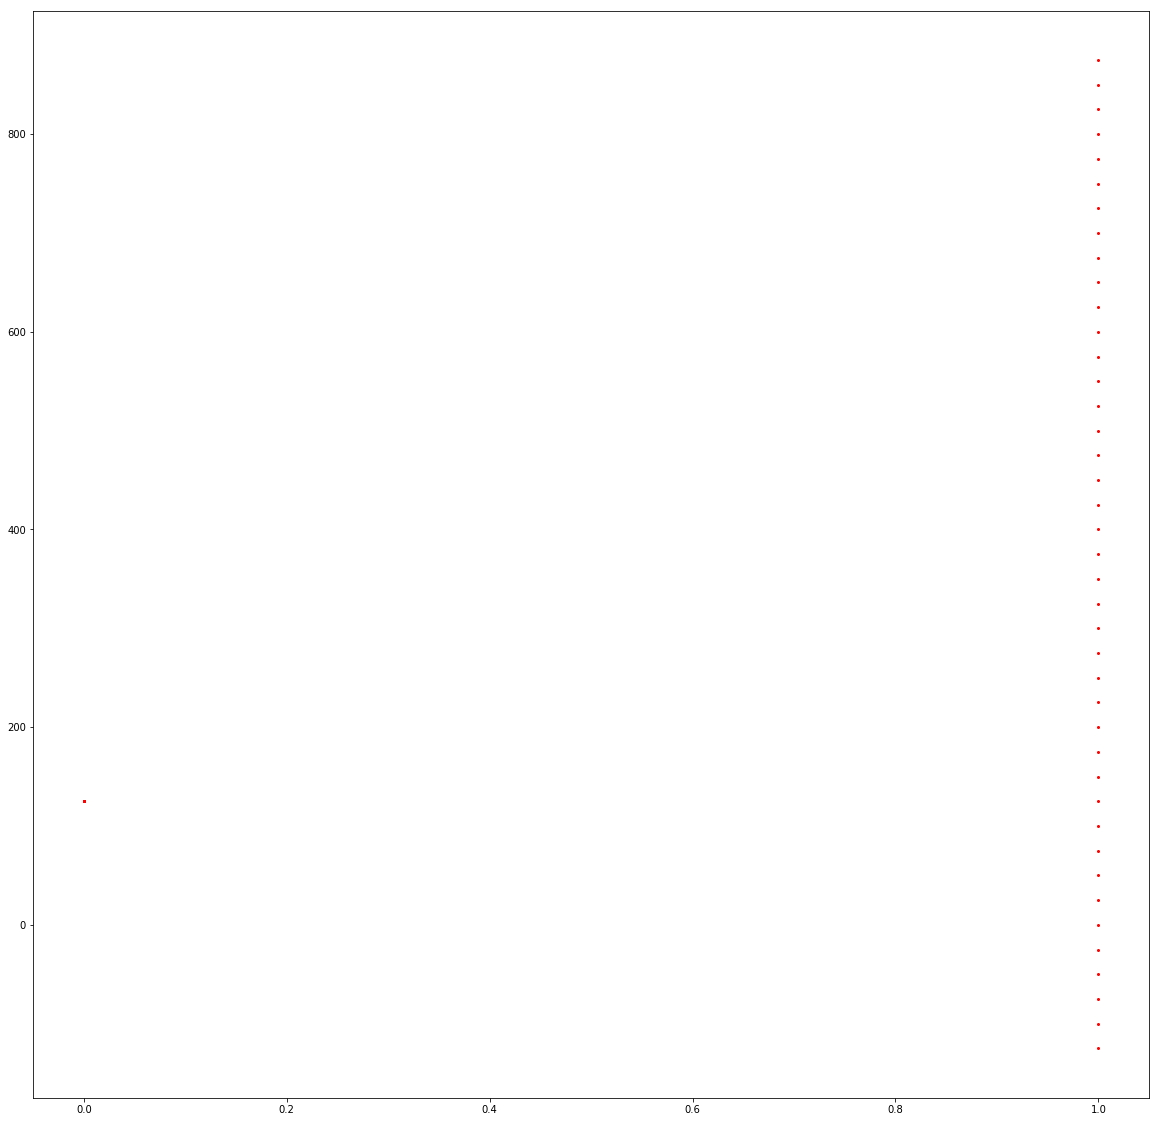

In [56]:
sspp = salvo_sp_list(active_rp=10, active_rl=4, rli=250, rpi=25, sp_salvo=40, spi=25)
plot_all_sp(sspp)

In [32]:
len(sspp)

41

In [42]:
active_rp=10
active_rl=4
rli=250
rpi=25
sp_salvo=40
spi=25
yoyo=LinePoints(active_rp*rpi/2, active_rl*rli/2-sp_salvo*spi/2, active_rp*rpi/2, active_rl*rli/2+sp_salvo*spi/2, spi)
yoyo.points_list()

[(125.0, 0.0),
 (125.0, 25.0),
 (125.0, 50.0),
 (125.0, 75.0),
 (125.0, 100.0),
 (125.0, 125.0),
 (125.0, 150.0),
 (125.0, 175.0),
 (125.0, 200.0),
 (125.0, 225.0),
 (125.0, 250.0),
 (125.0, 275.0),
 (125.0, 300.0),
 (125.0, 325.0),
 (125.0, 350.0),
 (125.0, 375.0),
 (125.0, 400.0),
 (125.0, 425.0),
 (125.0, 450.0),
 (125.0, 475.0),
 (125.0, 500.0),
 (125.0, 525.0),
 (125.0, 550.0),
 (125.0, 575.0),
 (125.0, 600.0),
 (125.0, 625.0),
 (125.0, 650.0),
 (125.0, 675.0),
 (125.0, 700.0),
 (125.0, 725.0),
 (125.0, 750.0),
 (125.0, 775.0),
 (125.0, 800.0),
 (125.0, 825.0),
 (125.0, 850.0),
 (125.0, 875.0),
 (125.0, 900.0),
 (125.0, 925.0),
 (125.0, 950.0),
 (125.0, 975.0),
 (125.0, 1000.0)]